<a href="https://colab.research.google.com/github/Damgef/Data_Science_Entrega1/blob/main/ProyectoDSParteI_DamianGeffroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE-ENTREGA TRABAJO DATA SCIENCE I

##**Abstract**

El presente trabajo se enmarca dentro del análisis de datos aplicado al sector bancario, tomando como base un conjunto de datos proveniente de una institución financiera portuguesa. Dicho dataset recopila información relacionada con campañas de marketing directo cuyo objetivo principal fue la promoción de depósitos a plazo fijo. Las campañas se realizaron a través de contactos telefónicos, registrando características socio-demográficas de los clientes, información financiera y variables asociadas al proceso de contacto, así como la variable objetivo que indica si el cliente finalmente suscribió o no al producto ofrecido.

La base de datos contiene 4521 registros y 17 variables, que incluyen tanto atributos numéricos (edad, sueldo, duración de la llamada, entre otros) como categóricos (nivel educativo, tipo de trabajo, estado civil, canal de contacto, etc.). Con estos datos explorare distintos factores que inciden en la efectividad de las campañas, con el propósito de extraer patrones y obtener conclusiones que resulten útiles para la toma de decisiones estratégicas en el ámbito del marketing bancario.

Para este primer análisis exploratorio de datos y con el objetivo de responder preguntas de negocio mediante visualizaciones y resúmenes estadísticos, planteo tres hipótesis:

1.   El nivel educativo junto con el estado civl de los clientes influyen en la probabilidad de aceptación de un depósito a plazo fijo, suponiendo que a mayor nivel de formación y estando casado, mayor predisposición a la contratación.

2.   La duración de la llamada telefónica impacta de manera positiva en la decisión final, partiendo de la idea de que interacciones más largas podrían reflejar un mayor interés y, por ende, mayor probabilidad de tomar el producto.

3.  El contacto por telefono movil tiene una mayor efectividad en la campaña, considerando que el mismo podria mejorar los resultados al estar disponible para los clientes en todo momento.



# Información de variables del Dataset (Extraida de la documentacion del dataset)

##Variables de entrada

###Datos del cliente bancario:
1 - edad (numérica)
2 - trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "gerente", "empleada doméstica", "empresario", "estudiante", "obrero", "autónomo", "jubilado", "técnico", "servicios")
3 - estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
4 - educación (categórica: "desconocido", "secundaria", "primaria", "terciaria")
5 - impago: ¿tiene crédito en impago? (binario: "sí", "no")
6 - saldo: saldo medio anual, en euros (numérico)
7 - vivienda: ¿tiene préstamo de vivienda? (binario: "sí", "no")
8 - préstamo: ¿tiene préstamo personal? (binario: "sí","no")

###Relacionado con el último contacto de la campaña actual:

9 - contacto: tipo de comunicación del contacto (categórico: "desconocido","teléfono","celular")
10- día: último día del mes del contacto (numérico)
11 - mes: último mes del año del contacto (categórico: "ene", "feb", "mar", ..., "nov", "dic")
12 - duración: duración del último contacto, en segundos (numérico)

###Otros atributos:

13 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
14 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido","otro","fracaso","éxito") Variable de salida (objetivo deseado): 17 - y - tiene ¿El cliente suscribió un depósito a plazo? (binario: "sí", "no")

In [14]:
import pandas as pd

#Importo el archivo CSV del respositorio
url = 'https://raw.githubusercontent.com/Damgef/Data_Science_Entrega1/refs/heads/main/bank.csv'

df_bank = pd.read_csv(url)

#Muestro las primeras 5 filas para hacer una previsualizacion de los datos
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
#Exploro si existen valores faltantes:
df_bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [16]:
#Muestro las Carateristicas del Dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
#Exploro las estadistidas descriptivas de los campos Edad y Sueldo:
df_bank[['age', 'balance']].describe()

,age,balance
count,4521.000000,4521.000000
mean,41.170095,1422.657819
std,10.576211,3009.638142
min,19.000000,-3313.000000
25%,33.000000,69.000000
50%,39.000000,444.000000
75%,49.000000,1480.000000
max,87.000000,71188.000000


###1º Hipotesis - El nivel educativo junto con el estado civl de los clientes influyen en la probabilidad de aceptación de un depósito a plazo fijo, suponiendo que a mayor nivel de formación y estando casado, mayor predisposición a la contratación.


Proporción de suscripción por nivel educativo:
 y                no       yes
education                    
primary    0.905605  0.094395
secondary  0.893755  0.106245
tertiary   0.857037  0.142963
unknown    0.898396  0.101604


<Figure size 800x600 with 0 Axes>

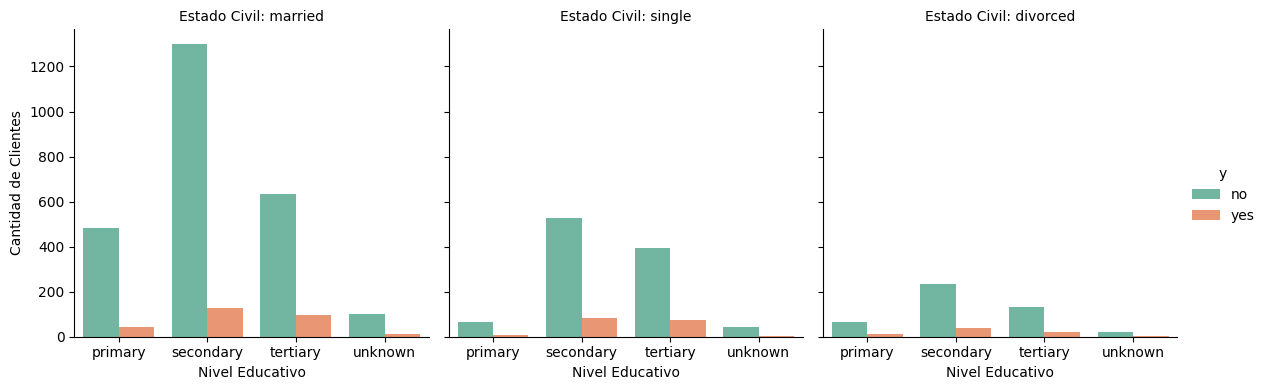

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

educ_exito = df_bank.groupby("education")["y"].value_counts(normalize=True).unstack().fillna(0)
print("\nProporción de suscripción por nivel educativo:\n", educ_exito)

plt.figure(figsize=(8, 6))
grafico1 = sns.catplot(data=df_bank, x="education", hue="y", col= "marital", kind= "count", order=educ_exito.index, col_wrap=3, height=4, palette= "Set2")
grafico1.set_titles("Estado Civil: {col_name}")
grafico1.set_axis_labels("Nivel Educativo", "Cantidad de Clientes")

###Análisis:
Los gráficos de barras muestra cómo se distribuyen las respuestas (sí/no) dentro de cada nivel educativo, separados por el estado civil. Se observa que la mayoría de clientes no suscribe al depósito, independientemente de su formación, aunque el porcentaje de aceptación varía según el grupo.
Los resúmenes numéricos evidencian que las personas con educación secundaria/terciaria y casadas tienden a tener una tasa de suscripción superior a quienes poseen iguales niveles de educación pero son solteros.

###Conclusión:
Dentro de los clientes que suscribieron el producto, el nivel educativo y el estado civil influyen en la decisión. Este patrón podría estar relacionado con una mayor comprensión de los productos financieros o una mayor confianza en instrumentos de ahorro por parte de los clientes con formación superior o igual a la secundaria y que poseen, ademas, de un grupo familiar de, cuanto menos, dos personas.

###2º Hipotesis - La duración de la llamada telefónica impacta de manera positiva en la decisión final, partiendo de la idea de que interacciones más largas podrían reflejar un mayor interés y, por ende, mayor probabilidad de tomar el producto.

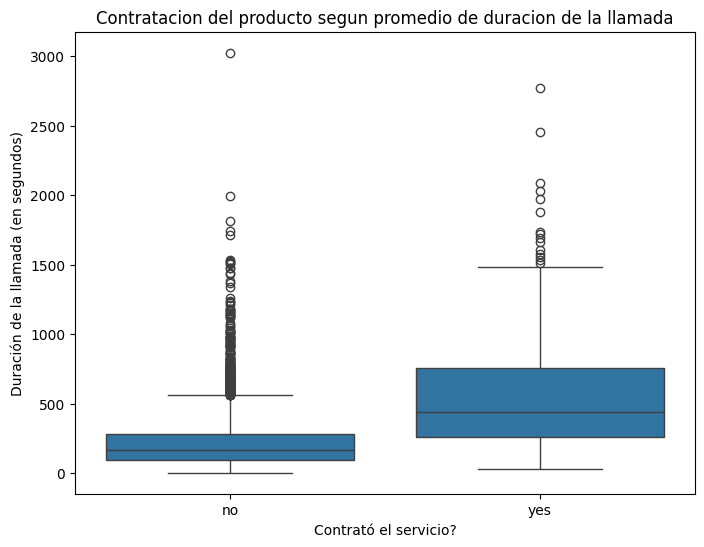


Contratacion del producto segun promedio de duracion de la llamada:



(None,
 y
 no     226.347500
 yes    552.742802
 Name: duration, dtype: float64)

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_bank, x="y", y="duration")
plt.title("Contratacion del producto segun promedio de duracion de la llamada")
plt.xlabel("Contrató el servicio?")
plt.ylabel("Duración de la llamada (en segundos)")
plt.show()


duracion_exito = df_bank.groupby("y")["duration"].mean()
print("\nContratacion del producto segun promedio de duracion de la llamada:\n"), duracion_exito

###Análisis:
El boxplot refleja una diferencia clara en la variable duración: las llamadas que terminan en suscripción suelen ser considerablemente más largas que las que no. El tiempo medio de conversación es mayor en los casos exitosos.
Esto spuede deberse a que probablemente los clientes interesados solicitan más información antes de tomar la decisión.

###Conclusión:
Cuanto mas dura la llamada, mas probabilidad hay de que el cliente suscriba el producto.

###3º Hipotesis - El contacto por telefono movil tiene una mayor efectividad en la campaña, considerando que el mismo podria mejorar los resultados al estar disponible para los clientes en todo momento.


Contratación segun canal de contacto:
 y                no       yes
contact                      
cellular   0.856354  0.143646
telephone  0.853821  0.146179
unknown    0.953927  0.046073


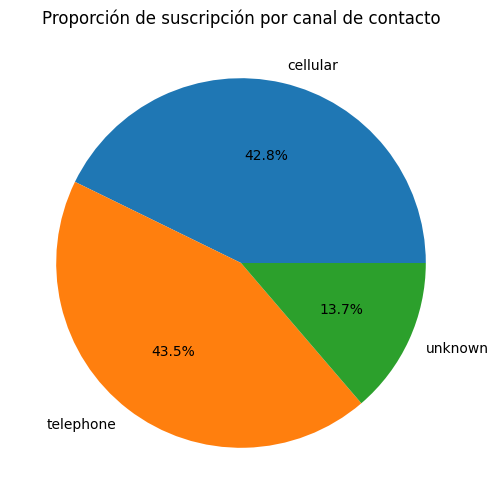

In [20]:
contacto_exito = df_bank.groupby("contact")["y"].value_counts(normalize=True).unstack().fillna(0)
print("\nContratación segun canal de contacto:\n", contacto_exito)

plt.figure(figsize=(8, 6))
contacto_exito['yes'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporción de suscripción por canal de contacto")
plt.ylabel("")
plt.show()

###Análisis:
El gráfico de torta permite comparar los resultados positivos de suscripcion del servicio entre los distintos canales de contacto (teléfono, celular o desconocido). No se observa que el canal celular presente una mayor proporción de suscripciones exitosas en comparación con el teléfono fijo.

###Conclusión:
Si bien los casos positivos de suscripcion por contactos por celular o Telefono de linea son mayores a los casos de contacto desconocido, no se observa una preponderancia de uno sobre otro, haciendo la caer la hipotesis inicial.

### Analisis Adicionales
Por ultimo me parecio interesante poder observar las suscripciones de productos por mes para poder ver si hay alguna estacionalidad en las mismas. Espero explorar esto mas en profundidad en la segunda parte del trabajo.

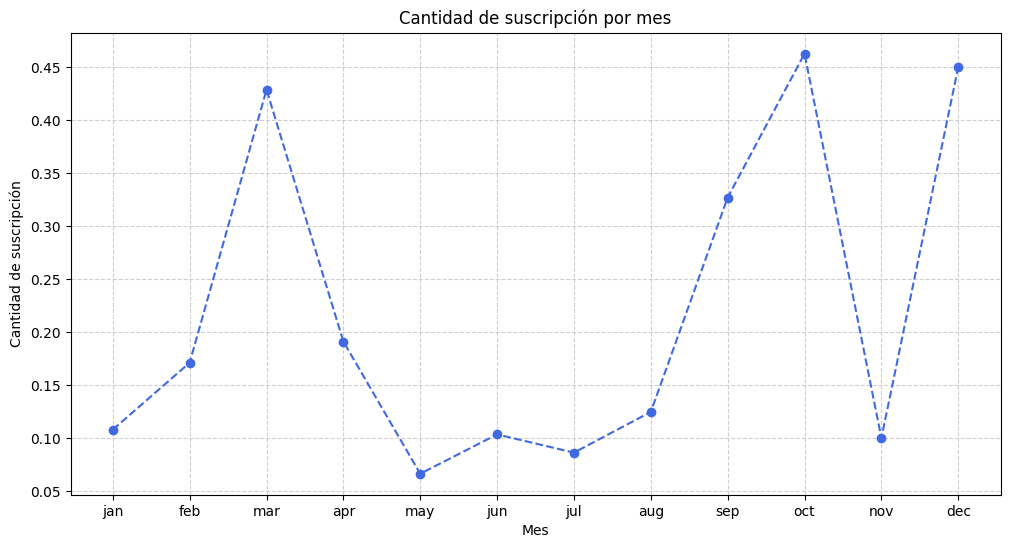

In [21]:
suscripciones_mes = df_bank.groupby("month")["y"].value_counts(normalize=True).unstack().fillna(0)

ordenar_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
suscripciones_mes = suscripciones_mes.reindex(ordenar_meses)

plt.figure(figsize=(12, 6))
plt.plot(range(len(suscripciones_mes)), suscripciones_mes['yes'], marker="o", linestyle="--", color="royalblue")
plt.title("Cantidad de suscripción por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de suscripción")
plt.xticks(range(len(suscripciones_mes)), suscripciones_mes.index) # Set x-ticks and labels
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Otro aspecto que me propuse explorar es la relación entre el resultado de la campaña anterior, el número de contactos en la campaña actual y la suscripción a un depósito.

Los clientes que tuvieron un resultado exitoso en la campaña anterior presentan una mayor proporción de suscripciones con un menor número de contactos en la campaña actual. Esto sugiere que los antecedentes positivos reducen la necesidad de insistencia.

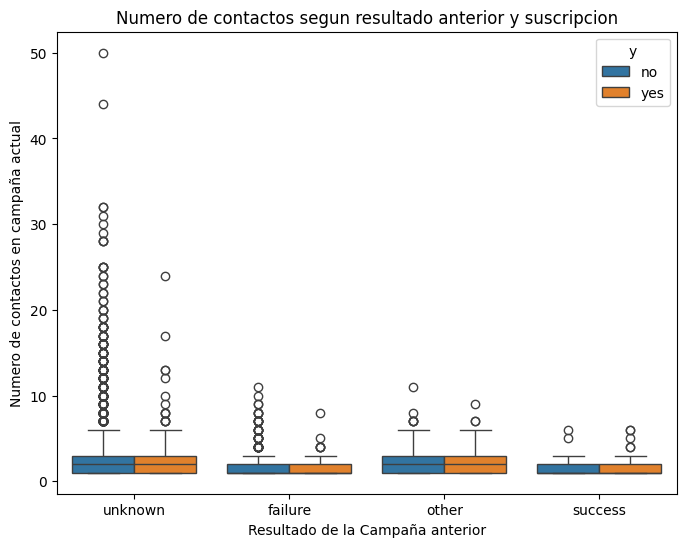


Promedio de contactos por resultado anterior y suscripción:

  poutcome    y  campaign
0  failure   no  1.985948
1  failure  yes  1.746032
2    other   no  2.358491
3    other  yes  2.315789
4  success   no  1.739130
5  success  yes  1.734940
6  unknown   no  3.012470
7  unknown  yes  2.489614


In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_bank, x="poutcome", y="campaign", hue="y")
plt.title("Numero de contactos segun resultado anterior y suscripcion")
plt.xlabel("Resultado de la Campaña anterior")
plt.ylabel("Numero de contactos en campaña actual")
plt.show()

campaign_mean = df_bank.groupby(["poutcome", "y"])["campaign"].mean().reset_index()
print("\nPromedio de contactos por resultado anterior y suscripción:\n")
print(campaign_mean)